# Normal Distribution

Simple STAN example of inferring the mean of a normal distribution

In [1]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import pystan

In [2]:
model_code = """
data {
    int<lower=1> N;
    real y[N];
}

parameters {
    real mu;
}

model {
    y ~ normal(mu, 1);
}
"""
model = pystan.StanModel(model_code=model_code)

In [3]:
observations = np.random.normal(size=100) + 5
data = dict(y=observations, N=len(observations))

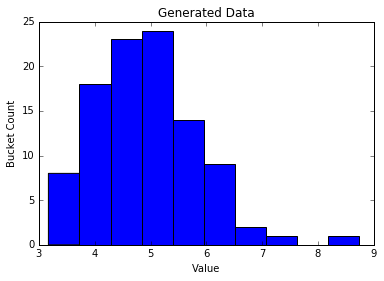

In [4]:
fig, ax = plt.subplots(1, 1)

ax.set_title('Generated Data')
ax.set_xlabel('Value')
ax.set_ylabel('Bucket Count')
ax.hist(observations)
plt.show()

In [5]:
fit = model.sampling(data=data)
samples = fit.extract()
print fit

Inference for Stan model: anon_model_0cefbdcd9fe10d3ab68541398677d6ad.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     4.92  3.4e-3    0.1   4.73   4.85   4.91   4.98   5.12  879.0    1.0
lp__ -44.08    0.03   0.73 -46.12 -44.21 -43.79 -43.63 -43.58  778.0    1.0

Samples were drawn using NUTS(diag_e) at Thu Mar  3 16:29:53 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


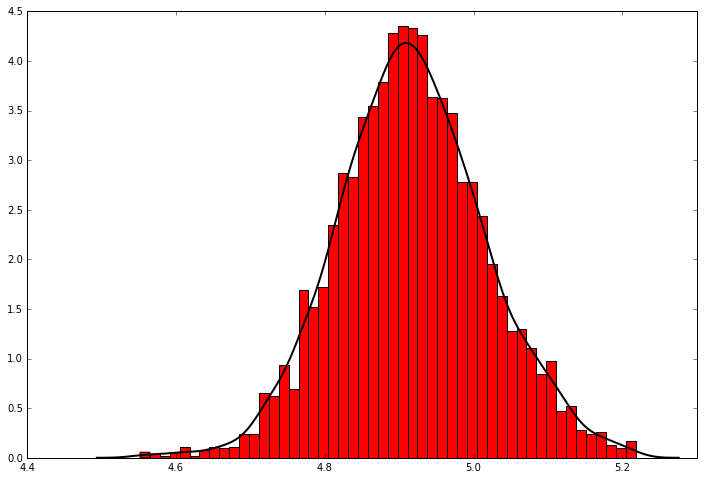

In [6]:
import statsmodels.api as stm

kde = stm.nonparametric.KDEUnivariate(samples['mu'])
kde.fit()

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.hist(samples['mu'], bins=50, normed=True, color='red')
ax.plot(kde.support, kde.density, lw=2, color='black');